In [1]:
import torch
import torch.optim as optim
import numpy as np
from maze_env import MazeEnv
from policy_network import PolicyNetwork
from sum_utils import train_agent
from policies import epsilon_greedy_policy, pure_stochastic
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [3]:

env = MazeEnv()

num_episodes = 1000
maze_size = (9, 9)

action_dim = env.action_space.n
print(action_dim)

4


In [4]:
maze_input_dim = np.prod(maze_size)
pos_input_dim = np.prod(maze_size)
policy_net = PolicyNetwork(maze_input_dim, pos_input_dim, action_dim).to(device)
policy = pure_stochastic
optimizer = optim.Adam(policy_net.parameters(), lr=1e-2)

In [5]:
reward_logs = train_agent(
    env, policy_net, policy, optimizer, num_episodes, maze_size, device
)

Episode 1: Total Reward: 0.95
Episode 2: Total Reward: 0.98
Episode 3: Total Reward: 0.88
Episode 4: Total Reward: 0.97
Episode 5: Total Reward: 0.99
Episode 6: Total Reward: 0.91
Episode 7: Total Reward: 0.89
Episode 8: Total Reward: 0.89
Episode 9: Total Reward: 0.98
Episode 10: Total Reward: 0.97
Episode 11: Total Reward: 0.75
Episode 12: Total Reward: 0.99
Episode 13: Total Reward: 0.98
Episode 14: Total Reward: 0.99
Episode 15: Total Reward: 0.9
Episode 16: Total Reward: 0.98
Episode 17: Total Reward: 0.98
Episode 18: Total Reward: 0.9299999999999999
Episode 19: Total Reward: 0.98
Episode 20: Total Reward: 0.94
Episode 21: Total Reward: 0.99
Episode 22: Total Reward: 0.95
Episode 23: Total Reward: 0.94
Episode 24: Total Reward: 0.99
Episode 25: Total Reward: 0.96
Episode 26: Total Reward: 0.99
Episode 27: Total Reward: 0.99
Episode 28: Total Reward: 0.97
Episode 29: Total Reward: 0.99
Episode 30: Total Reward: 0.98
Episode 31: Total Reward: 0.98
Episode 32: Total Reward: 0.97
Epis

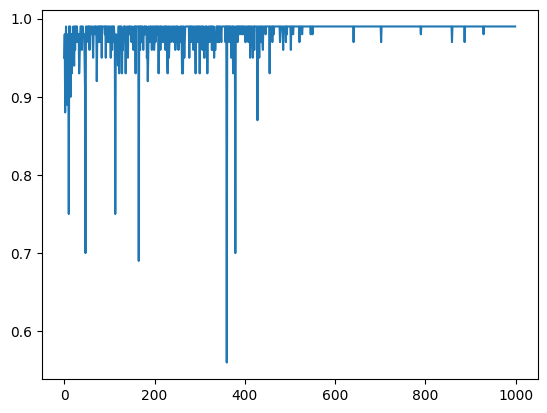

In [6]:
xs = [x for x in range(len(reward_logs))]

plt.plot(xs, reward_logs)
plt.show()

In [ ]:
print

 # Some Markdown
 - some list
 $\lambda$